# Numerical Integration of Differential Equations
Mohan Deo 2021

This interactive notebook first finds an optimal numerical method to predict the motion of a mass-spring system with no external force applied. It then uses this numerical method to predict the motion of the system when it is 'pushed' (a force is applied for a short period of time) and when it is driven by a sinusoidal force. The resonant frequency of the system is also determined. Following this, the motion of a coupled oscillator is investigated, as well as the normal frequency of a molecule. After this, a model is made for a triatomic molecule and its motion is investigated.

### Importing libraries

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import cmath as cm
import matplotlib.pyplot as plt

### Initial parameters

In [3]:
#using the values given in the class list, m in kg, k in kg/s^2
m = 2.47
k = 1.15

#b=damping constant in kg/s and giving the initial values for x=position in m and v=velocity in m/s
b = 0
x0 = 2.5
v0 = 0

## Comparing methods

Four numerical methods to the analytical solution in order to determine which is most accurate. These numerical methods are:
    
    1. Euler's method
    2. Improved Euler method
    3. Verlet's method
    4. Euler-Cromer method
    
All methods will first be compared in the undamped case.

Only methods 3 and 4 are symplectic (energy conserving).

The equation of motion for a mass-spring system is given by equation 1.

<p><div align="center">$ma = -kx -bv$</div> <div align="right">Equation 1</div></p>

Dividing equation 1 throughout by m leads to an expression for acceleration.

<p><div align="center">$a = \large{-\frac{k}{m}}x -\large{\frac{b}{m}}v$</div> <div align="right">Equation 2</div></p>


### 1. Euler method

The Euler Method is given by equation 3.

<p><div align="center">$f(x)_{i+1} = f(x)_i + hf'(x)_i$</div> <div align="right">Equation 3</div></p>

Therefore, the velocity at any point in time is given by equation 4.

<p><div align="center">$v_{i+1} = v_i + ha_i$</div> <div align="right">Equation 4</div></p>

Since, the velocity of the mass-spring system is now known for all time, the position of the mass can also be found. This is given in equation 5.

<p><div align="center">$x_{i+1} = x_i + hv_i$</div> <div align="right">Equation 5</div></p>

The error on this method stems from the taylor expansion of the derivative of position with respect to time. Only terms up to the first order of h are taken into account. Therefore, the error is of the order of h$^2$ . 

An array does not need to be created for acceleration as future values of acceleration do not directly rely on previous values of acceleration. This is true for all methods.

In [4]:
def euler(b_value, h_value, nstep_value):
    
    x = np.zeros(nstep_value)
    v = np.zeros(nstep_value)
    x[0] = x0
    v[0] = v0
    
    for i in range(nstep_value - 1):
        
        a = -(k / m) * x[i] - (b_value / m) * v[i]
        x[i + 1] = x[i] + v[i] * h_value
        v[i + 1] = v[i] + a * h_value

    return x, v

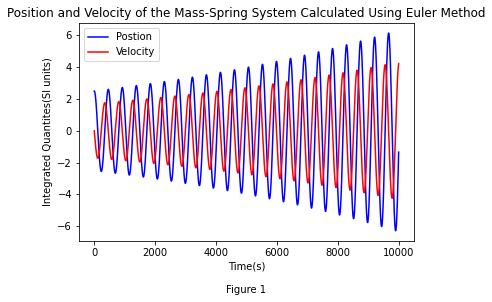

In [5]:
#time model will run for (in s)
T = 200
#step size (in s)
h = 0.02
#Calculating the number of steps, this needs to be an integer
nsteps = int(T / h)
time = np.arange(0, nsteps)

#plotting the results for the Euler method
time = np.arange(0, nsteps)
plt.plot(time, euler(b, h, nsteps)[0], 'b', label='Postion')
plt.plot(time, euler(b, h, nsteps)[1], 'r', label='Velocity')
plt.xlabel('''Time(s)
           
Figure 1''')
plt.ylabel('Integrated Quantites(SI units)')#position in m and velocity in m/s
plt.legend()
plt.title('Position and Velocity of the Mass-Spring System Calculated Using Euler Method')
plt.show()

As can be seen in Figure 1, the amplitude of each oscillation increases with time. This is explained below.

In a mass spring system, the total energy is given by equation 6.

<p><div align="center">$E_{i+1} = \frac{1}{2}mv_{i+1}^2 + \frac{1}{2}kx_{i+1}^2$</div> <div align="right">Equation 6</div></p>

Substituting in the expressions for $v_{i+1}$ and $x_{i+1}$ (from equations 4 and 5) leads to equation 7.

<p><div align="center">$E_{i+1} = E_i(1 + \frac{k}{m}h^2)$ </div> <div align="right">Equation 7</div></p>

Therefore, the Euler method predicts an increasing energy in the system. This is a result of the Euler method being non-symplectic.

This is not what is expected for an undamped system. In an undamped system, energy is conserved and so the amplitude of each oscillation is constant.

### 2. Improved Euler Method

This method is exactly the same as the Euler method but contains one more term from the Taylor expansion of the derivative.

The general equation for the improved Euler method is shown by equation 8.

<p><div align="center">$f(x)_{i+1} = f(x)_i + hf'(x)_i + \frac{h^2}{2}f''(x)_i$</div> <div align="right">Equation 8</div></p>

The expression for position of the mass using this method is given by equation 9.

<p><div align="center">$x_{i+1} = x_i + hv_i + \frac{h^2}{2}a_i$</div> <div align="right">Equation 9</div></p>

The expressions for velocity and acceleration remain the same as equations 4 and 2 respectively.

Since this method includes an $h^2$ term, its error is of the order $h^3$.

In [6]:
def improved_euler(b_value, h_value, nstep_value):
    
    x = np.zeros(nstep_value)
    v = np.zeros(nstep_value)
    x[0] = x0
    v[0] = v0
    
    for i in range(nstep_value - 1):
        
        a = -(k / m) * x[i] - (b_value / m) * v[i]
        x[i + 1] = x[i] + v[i] * h_value + ((h_value ** 2) / 2) * a
        v[i + 1] = v[i] + a * h_value
    
    return x, v

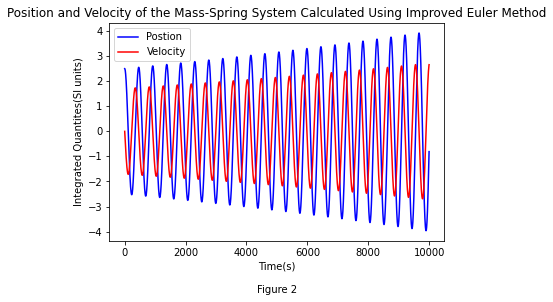

In [7]:
#time model will run for (in s)
T = 200
#step size (in s)
h = 0.02
#Calculating the number of steps, this needs to be an integer
nsteps = int(T / h)
time = np.arange(0, nsteps)

#plotting the results for the improved Euler method
plt.plot(time, improved_euler(b, h, nsteps)[0], 'b', label='Postion')
plt.plot(time, improved_euler(b, h, nsteps)[1], 'r', label='Velocity')
plt.xlabel('''Time(s)
           
Figure 2''')
plt.ylabel('Integrated Quantites(SI units)')#position in m and velocity in m/s
plt.legend()
plt.title('Position and Velocity of the Mass-Spring System Calculated Using Improved Euler Method')
plt.show()

This method is also non-symplectic and this method predicts increasing energy. This is why the amplitude of each oscillation increases with time in Figure 2.

The expression for energy at the $(i + 1)^{th}$ step is found using the same process as before and is given in equation 10.

<p><div align="center">$E_{i+1} = E_i + \frac{1}{2}kA  + \frac{1}{2}mB$</div> <div align="right">Equation 10</div></p>

<p>$A = h^2v_i^2 + \frac{h^4}{4}a_i^2 + 2hx_iv_i + h^2x_ia_i + h^3v_ia_i$</p>
$B = h^2a_i^2 + 2hv_ia_i$

A and B are both positive terms and so the energy is always increasing.



### 3. Verlet's method

This numerical method works by using approximations for derivatives.

In order to find an expression for the $(i + 1)^{th}$ step of position of the mass, the central difference approximation of the second derivative is used. Therefore, the central difference approximation gives the acceleration of the mass in terms of the mass' position at points in time. Since the acceleration of the mass is known (equation 2), an expression for the $(i + 1)^{th}$ step its position can be found. The central difference approximation to the second derivative is given by equation 11.

<p><div align="center">$f''(x) = \large{\frac{f(x + h) - 2f(x) + f(x - h)}{h^2}}$</div> <div align="right">Equation 11</div></p>

Substituting in acceleration for the second derivative and position for $f(x)$ leads to equation 12.

<p><div align="center">$a_i = \large{\frac{x_{i + 1} - 2x_i + x_{i - 1}}{h^2}}$</div> <div align="right">Equation 12</div></p>


This means that the position of the mass at the $(i + 1)^{th}$ step is given by equation 13.

<p><div align="center">$x_{i + 1} = 2x_i + -x_{i - 1} + h^2a_i$</div> <div align="right">Equation 13</div></p>

In order to find an expression for the velocity at the $i^{th}$ step, the mean value theorem is used. This is stated in equation 14.

<p><div align="center">$f'(c) = \large{\frac{f(b) - f(a)}{b - a}}$</div> <div align="right">Equation 14</div></p>

Where $c$ lies in the interval between $a$ and $b$.

Substituting in velocity and position as well as the appropriate steps for $a$, $b$ and $c$ leads to equation 15.

<p><div align="center">$v_i = \large{\frac{x_{i + 1} - x_{i - 1}}{2h}}$</div> <div align="right">Equation 15</div></p>

However, equations 2, 13 and 15 cannot be solved separately. They must therefore be combined to give a new expression for the $(i + 1)^{th}$ step of position of the mass. This is shown in equation 16.

<p><div align="center">$x_{i + 1} = Ax_i + Bx_{i - 1}$</div> <div align="right">Equation 16</div></p>
$A = 2\frac{2m - kh^2}{D}$,
$B = \frac{bh - 2m}{D}$,
$D = 2m + bh$

There is a problem with equation 16 as calculating the $(i + 1)^{th}$ step of position of the mass requires knowing the position of the mass two steps before. This means that Verlet's method cannot find the position of the mass at the first step. This is because it would require knowing the position of the mass at a time before the system was set in motion. It is for this reason that Verlet's method is said to not be a self-starting method.

Instead, another method must be used to calculate the position of the mass at the first step. The Euler-Cromer method was chosen as this is also symplectic.


In [8]:
def verlet(b_value, h_value, nstep_value):
    
    x = np.zeros(nstep_value)
    v = np.zeros(nstep_value)
    x[0] = x0
    v[0] = v0
    
    #using the Euler-Cromer method to find x[1]
    v[1] = v[0] - h_value * ((k / m) * x[0] + (b_value / m) * v[0])
    x[1] = x[0] + h_value * v[1]
    
    #now using Verlet's method for all other values
    for i in range(2, nstep_value - 1):
        
        
        D = 2 * m + b_value * h_value
        A = 2 * ((2 * m - k * h_value ** 2) / D)
        B = (b_value * h_value - 2 * m) / D
        
        #Verlet's method
        x[i + 1] = A * x[i] + B * x[i - 1]
        v[i] = (x[i + 1] - x[i - 1]) / (2 * h_value)
        
    return x, v

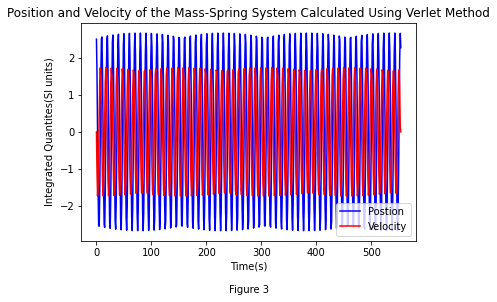

In [9]:
#time model will run for (in s)
T = 500
#step size (in s)
h = 0.9
#Calculating the number of steps, this needs to be an integer
nsteps = int(T / h)
time = np.arange(0, nsteps)

#plotting the results for Verlet's method
plt.plot(time, verlet(b, h, nsteps)[0], 'b', label='Postion')
plt.plot(time, verlet(b, h, nsteps)[1], 'r', label='Velocity')
plt.xlabel('''Time(s)
           
Figure 3''')
plt.ylabel('Integrated Quantites(SI units)')#position in m and velocity in m/s
plt.legend()
plt.title('Position and Velocity of the Mass-Spring System Calculated Using Verlet Method')
plt.show()

Verlet's method seems to be the most accurate numerical method, judging by eye from Figure 3, when $h$ is small (0.02s for example). This is true of the three methods considered so far. It is due to the equation for positon (equation 13) being quartic in $h$. Therefore, the error of this method is much smaller than the others and is of the order of $h^4$. 

However, when $h$ is increased (to 0.9s, for example), the periodic pertubation about the actual amplitude becomes more clear. This pertubation is of order $h^2$ and is problematic as the ampltiude in an undamped system should stay constant. For Verlet's method, time step values over 0.2251 times the period of the system lead to instabilities.

### Euler-Cromer Method

The Euler-Cromer method is shown in equation 17.

<p><div align="center">$f(x)_{i + 1} = f(x)_i - hf'(x)_i$</div> <div align="right">Equation 17</div></p>

This means that the equation for the $(i + 1)^{th}$ step of velocity is as below:

<p><div align="center">$v_{i + 1} = v_i - h(\large{\frac{k}{m}}x_i + \large{\frac{b}{m}}v_i)$</div> <div align="right">Equation 18</div></p>

where the full expression for acceleration (equation 2) has been substituted into equation 16.

The expression for position is given by equation 19.

<p><div align="center">$x_{i + 1} = x_i - hv_i$</div> <div align="right">Equation 19</div></p>


In [10]:
def euler_cromer(b_value, h_value, nstep_value):
    
    x = np.zeros(nstep_value)
    v = np.zeros(nstep_value)
    x[0] = x0
    v[0] = v0
    
    for i in range(nstep_value - 1):

        v[i + 1] = v[i] - h_value * ((k / m) * x[i] + (b_value / m) * v[i])
        x[i + 1] = x[i] + h_value * v[i + 1]
        
    return x, v

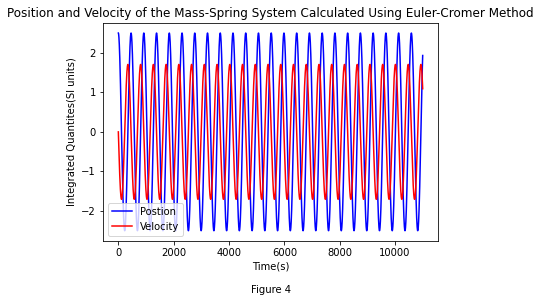

In [11]:
T = 220
#step size (in s)
h = 0.02
#Calculating the number of steps, this needs to be an integer
nsteps = int(T / h)
time = np.arange(0, nsteps)

plt.plot(time, euler_cromer(b, h , nsteps)[0], 'b', label='Postion')
plt.plot(time, euler_cromer(b, h , nsteps)[1], 'r', label='Velocity')
plt.xlabel('''Time(s)
           
Figure 4''')
plt.ylabel('Integrated Quantites(SI units)')#position in m and velocity in m/s
plt.legend()
plt.title('Position and Velocity of the Mass-Spring System Calculated Using Euler-Cromer Method')
plt.show()

This method is symplectic (area preserving). The effect of this can be seen in Figure 4. The amplitude of each oscillation remains constant, as does the maximum velocity, This means that the total energy of the system remains constant.

### Analytical Solution

The analytical solution gives a direct comparison for each of the numerical methods. Once it has been determined, the energy of the system calculated using the analytical solution can be compared with the energy calculated using the numerical methods.

The analytical solution for the system changes, depending on the level of damping. When a system is damped there are three ways to categorise the level of damping. In order to do this, the constant, $ \gamma $ is defined. This is the ratio of the damping constant to the mass oscillating. The inverse of gamma gives the time for the energy to drop to $ \frac{1}{e} $ of its initial value.

<p><div align="left">1. If $ \gamma ^ 2 / 4 < \omega_0 $ then the system is underdamped, also referred to as light damping.</div></p>
    
<p><div align="left">2. If $ \gamma^2 / 4 > \omega_0 $ then the system is overdamped, also referred to as heavy damping. The system returns to equilibrium without oscillation.</div></p>
    
<p><div align="left">3. If $ \gamma^2 / 4 = \omega_0 $ then the system is critically damped. It returns to equilbrium in the shortest time possible.</div></p>

The constant, $ \omega_0 $ refers to the natural frequency of the system. It is equal to $ \large{\sqrt{\frac{k}{m}}} $.

A comparison of the different types of damping is given in Figure 8.

In [33]:
def analytical(b_value, nstep_value, h_value):
    
    w_0 = np.sqrt(k / m)
    gamma = b_value / m
    w = cm.sqrt(w_0 ** 2 - (gamma ** 2) / 4)
    x = np.zeros(nstep_value, dtype = 'complex_')
    v = np.zeros(nstep_value, dtype = 'complex_')
    x[0] = x0
    v[0] = v0
    t = np.arange(0, T, h_value)
    
    for i in range(nstep_value - 1):
    
        if ((gamma ** 2) / 4) < w_0 ** 2: #light damping

            x[i + 1] = x0 * np.exp(-gamma * t[i] / 2) * np.cos(w * t[i])
            v[i + 1] = x0 * np.exp(-gamma * t[i] / 2) * (2 * w * np.sin(w * t[i]) + gamma * np.cos(w * t[i])) / 2

        elif ((gamma ** 2) / 4) > w_0 ** 2: #heavy damping

            x[i + 1] = cm.exp(-gamma * t[i] /2) * (0.5 * (x0 - ((2 * v0) / (w * gamma))) * cm.exp(w * t[i]) + 
                                                       (x0 - 0.5 * (x0 - ((2 * v0) / (w * gamma)))) * cm.exp(-w * t[i]))
            v[i + 1] = -((w * x0 * gamma ** 2 + (-2 * (w ** 2) * x0 - 2 * v0) * gamma + 4 * v0 * w) * cm.exp(2 * w * t[i])
                         + w * x0 * (gamma ** 2) + (2 * (w ** 2) * x0 + 2 * v0) * gamma + 4 * v0 * w) * cm.exp((-gamma * t[i] / 
                                                                                                                2) - 
                        w * t[i]) / (4 * w * gamma)
            
            
        else: #critical damping

            x[i + 1] = x0 * np.exp(-gamma * t[i] / 2) + (v0 + 0.5 * gamma * x0) * np.exp(-gamma * t[i] / 2)
            v[i + 1] = -gamma * (x0 * gamma + 2 * x0 + 2 * v0) * np.exp(-gamma * t[i] / 2) / 4
        
    return x, v

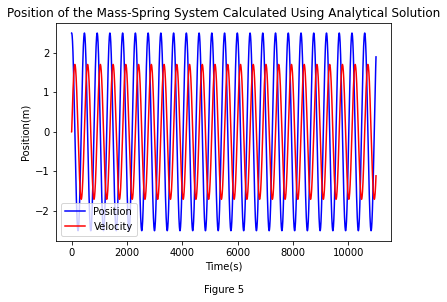

In [34]:
T = 220
#step size (in s)
h = 0.02
#Calculating the number of steps, this needs to be an integer
nsteps = int(T / h)
time = np.arange(0, nsteps)

plt.plot(time, analytical(b, nsteps, h)[0], 'b', label='Position')
plt.plot(time, analytical(b, nsteps, h)[1], 'r', label='Velocity')
plt.xlabel('''Time(s)
           
Figure 5''')
plt.ylabel('Position(m)')
plt.title('Position of the Mass-Spring System Calculated Using Analytical Solution')
plt.legend()
plt.show()

Comparing the energy of the numerical solutions to the analytical solution - for light damping

In order to determine which of the numerical solutions was best scientifically a comparison of energy was used. The energy of each solution was calculated using the positions and velocities determined from each method. The actual energy of the system, using the positions and velocities calculated using the analytical method were also then found. This is the purpose of the energy_calculator function.

The equation used to determine the accuracy of each method is shown below:

<p><div align="center">$\large{\sum_{i}(\frac{(E_{A_i} - E_{M_i})^2}{E_{A_i}})}$</div> <div align="right">Equation 20</div></p>

where $E_{A_i}$ is the energy of the the system using the analytical solution at the $i^{th}$ step and $E_{M_i}$ is the energy of the system using the numerical method at the $i^{th}$ step. This results in a single value.

This process was then repeated for different values of $h$. The accuracy value was then plotted against $h$ in Figure 6 to illustrate the relationship between them. The value of the damping constant, b was fixed at 0 so that the effect of changing $h$ could clearly be seen.


In [14]:
b = 0 #no damping

def energy_calculator(array1, array2):
    
    return 0.5 * k * array1 ** 2 + 0.5 * m * array2 ** 2



h_array = np.sort(np.array([0.1, 0.02, 0.2]))#have to sort otherwise python draws lines linking the wrong points and the 
#graphs are wrong - cannot assume user will put values in order
differences_euler = np.array([])
differences_improved_euler = np.array([])
differences_verlet = np.array([])
differences_eulercromer = np.array([])


for hstep in h_array:
    
    nsteps_1 = int(T / hstep)
    
    t_times = np.arange(0, T, hstep)
    energy_analytical = 0.5 * k * x0 ** 2 * np.exp(-(b / m) * t_times) #for light damping
    
    def difference_calculator(array1, array2):

        values =  ((energy_analytical - energy_calculator(array1, array2))**2) / energy_analytical
        sum = 0
        for i in range(len(values)):
            sum = sum + values[i]
        
        return sum
            
    differences_euler = np.append(differences_euler, 
                                  difference_calculator(euler(b, hstep, nsteps_1)[0], euler(b, hstep, nsteps_1)[1]))
    differences_improved_euler = np.append(differences_improved_euler, 
                                           difference_calculator(improved_euler(b, hstep, nsteps_1)[0], 
                                                                 improved_euler(b, hstep, nsteps_1)[1]))
    differences_verlet = np.append(differences_verlet, 
                                   difference_calculator(verlet(b, hstep, nsteps_1)[0], verlet(b, hstep, nsteps_1)[1]))
    differences_eulercromer = np.append(differences_eulercromer, 
                                        difference_calculator(euler_cromer(b, hstep, nsteps_1)[0], 
                                                              euler_cromer(b, hstep, nsteps_1)[1]))

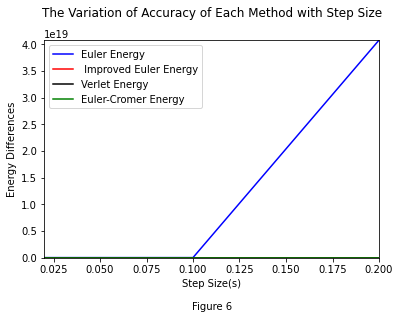

In [15]:
plt.plot(h_array, differences_euler, 'b', label='Euler Energy')
plt.plot(h_array, differences_improved_euler, 'r', label=' Improved Euler Energy')
plt.plot(h_array, differences_verlet, 'k', label='Verlet Energy')
plt.plot(h_array, differences_eulercromer, 'g', label='Euler-Cromer Energy')
plt.legend()
plt.xlabel('''Step Size(s)
           
Figure 6''')
plt.ylabel('Energy Differences')
plt.title('The Variation of Accuracy of Each Method with Step Size',  y=1.08)
plt.autoscale(tight=True)
plt.show()

Euler-Cromer method is best as the energy calculated by this method is closest to the analytical solution for energy for all time.

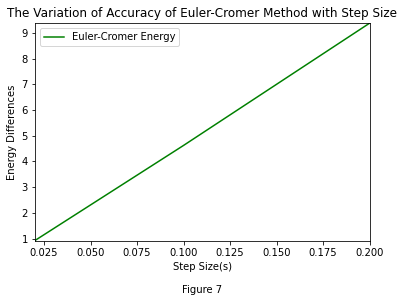

In [16]:
plt.plot(h_array, differences_eulercromer, 'g', label='Euler-Cromer Energy')
plt.legend()
plt.xlabel('''Step Size(s)
           
Figure 7''')
plt.ylabel('Energy Differences')
plt.autoscale(tight=True)
plt.title('The Variation of Accuracy of Euler-Cromer Method with Step Size')
plt.show()

This is a stright line graph and so decreasing the step size leads to a directly proportional increase in the accuracy of the method

### Effect of damping on position

Plotting the solution of the Euler-Cromer method with the damping term equal to half the critical value (light damping), the critical value (critical damping) and double the critical value (heavy damping).

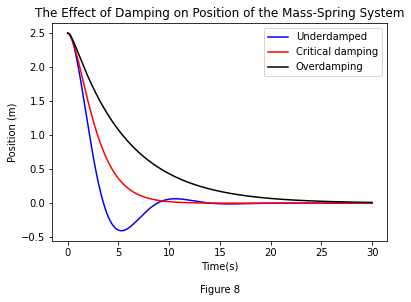

In [17]:
b_cr = np.sqrt(4 * k * m)
h = min(h_array) #h is picked to be the minimum value in the array due to the straight line relationship - 
#it will not change for the rest of the time one oscillator is considered
T = 30
nsteps = int(T / h)

plt.plot(np.arange(0, len(euler_cromer(b_cr / 2, h , nsteps)[0])) * h, 
         euler_cromer(b_cr / 2, h , nsteps)[0], 'b', label='Underdamped')
plt.plot(np.arange(0, len(euler_cromer(b_cr, h , nsteps)[0])) * h, 
         euler_cromer(b_cr, h , nsteps)[0], 'r', label='Critical damping')
plt.plot(np.arange(0, len(euler_cromer(b_cr * 2, h , nsteps)[0])) * h, 
         euler_cromer(b_cr * 2, h , nsteps)[0], 'k', label='Overdamping')
plt.xlabel('''Time(s)
           
Figure 8''')
plt.ylabel('Position (m)')
plt.legend()
plt.title('The Effect of Damping on Position of the Mass-Spring System')
plt.show()

Using the Euler-Cromer method to find the motion of a pendulum that is given a push in the direction of acceleration (opposite to velocity). Each time step is equal to the value of $h$. So if the force is applied after 5 steps, then it would be applied after $5h$ seconds.

Figure 9 currently shows the effect of the application of a push after the system has reached equilibrium in an underdamped system. 

The size of the force applied (F), the time of its application (step_number) and the damping constant (b_value) can all be changed by inputting different values for each of the arguments in the eulercromer_push function when plotting Figures 9 and 10.

The eulercromer_push function also has a power argument, which determines the power that the $-1$ multiplying the quantity $F / m$ is raised to. The quantity $F / m$ corresponds to the acceleration caused by the push, where F is the force applied to the system. If the power argument is $1$ then $F / m$ is negative. If the power argument is $2$, then $F / m$ is positive. Since a multiple of $-h$ has been factored out, then negative $F/ m$ corresponds to a push in the opposite direction to the initial acceleration of the system and a positive $F / m$ corresponds to a push in the same direction as the inital acceleration of the system.

In [18]:
def eulercromer_push(F, step_number, b_value, power): #power can either be one or two and F is in N
    
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)
    x[0] = x0
    v[0] = v0
            
    for i in range(nsteps - 1):
        
        if i == step_number:
            
            v[i + 1] = v[i] - h * ((k / m) * x[i] + (b_value / m) * v[i] + ((-1) ** power) * (F / m))
            x[i + 1] = x[i] + h * v[i + 1]
            
        else:

            v[i + 1] = v[i] - h * ((k / m) * x[i] + (b_value / m) * v[i])
            x[i + 1] = x[i] + h * v[i + 1]

            
    return x, v

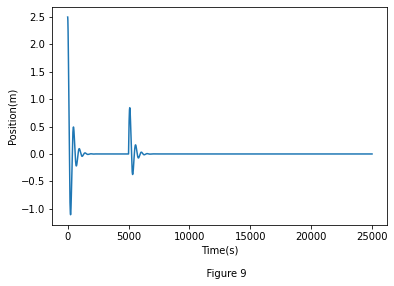

In [19]:
T = 500
nsteps = int(T / h)
time = np.arange(0, nsteps)

plt.plot(time, eulercromer_push(100, 5000, b_cr / 4, 1)[0])
plt.xlabel('''Time(s)
           
    Figure 9''')
plt.ylabel('Position(m)')
plt.show()

Using the Euler-Cromer method to find the motion of a pendulum that is given a push opposite to the direction of acceleration (in the same direction as instantaneous velocity). The effect of this force is best illustrated in an undamped system, since it acts in the opposite direction to acceleration (and so the effect of the force does not disappear quickly).

Figure 10 currently shows a force applied in the opposite direction to acceleration in an undamped system. This results in its oscillation out of phase with its original form and with a decreased amplitude. 

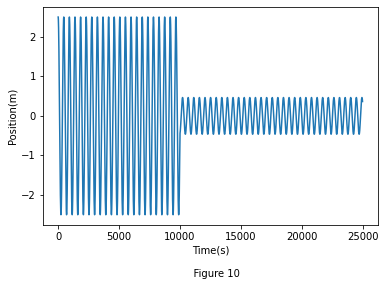

In [20]:
plt.plot(time, (eulercromer_push(200, 10000, 0, 2)[0]))
plt.xlabel('''Time(s)
           
    Figure 10''')
plt.ylabel('Position(m)')
plt.show()

### Sinusoidal driving force

The eulercromer_sin_drivingforce works in a similar way to the eulercromer_push function. Except the force now applied for all time and is sinusoidal. Since $a = F / m$ and the Euler-Cromer method is given by equation 17, the velocity is as below:

<p><div align="center">$\large{v_{i + 1} = v_i - \frac{h(\Large{\frac{k}{m}}x_i + \Large{\frac{b}{m}}v_i - Asin(ih\omega))}{m}}$</div> <div align="right">Equation 21</div></p>

where $A$ is the amplitude of the driving force and $\omega$ is the driving frequency.


Figure 11 currently shows an underdamped system.

In Figure 11, from 0 - 30000 seconds, there is a transient response in the system. After this period of time, the system has damped the initial motion from the initial displacement of the mass. Therefore, as time goes on the motion of the system becomes more uniform.

The system and so what is displayed in Figure 11 can be changed by changed the arguments of the eulercromer_sin_drivingforce function.

In [21]:
def eulercromer_sin_drivingforce(b_value, A, driving_freq): #b_value in kg/s, driving_freq in rad/s and A in N
    
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)
    x[0] = x0
    v[0] = v0
            
    for i in range(nsteps - 1):
                    
        v[i + 1] = v[i] - h * ((k / m) * x[i] + (b_value / m) * v[i] - (A * (np.sin(driving_freq * (i) * h)) / m))
        x[i + 1] = x[i] + h * v[i + 1]
        
    return x, v

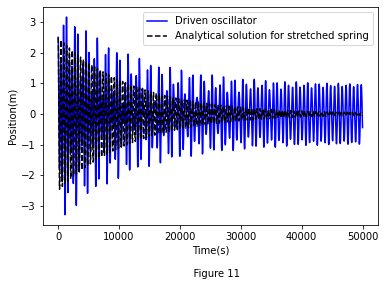

In [22]:
T = 1000
nsteps = int(T / h)
time = np.arange(0, nsteps)

plt.plot(time, eulercromer_sin_drivingforce(0.02, 0.5, 0.5)[0], 'b', label='Driven oscillator')
plt.plot(time, analytical(0.02, nsteps, h)[0], 'k', linestyle='dashed', label='Analytical solution for stretched spring')

plt.xlabel('''Time(s)
           
    Figure 11''')
plt.ylabel('Position(m)')
plt.legend()
plt.show()

### Investigating resonance

Resonant frequency occurs when the driving frequency is in phase oscillations in the system. This results in the maximum amplitude occuring at that frequency.

This resonant frequency is equal to the natural frequency of the system (given in the analytical solution section) in an undamped system. This is shown in Figure 12.

As the damping of the system increases, the resonant frequency decreases. This is shown in Figure 13.

The eulercromer_sin_drivingforce_resonance_1 function works in a similar way to eulercromer_sin_drivingforce function. However, it takes a range of driving frequencies as its argument for driving_freq. Instead of outputting position and velocity, it outputs the maximum value of position and velocity. The initial value of position and velocity in the system is set to zero as these parameters will not affect the resonant frequency value.

The maxium amplitude of the system and driving frequency are then plotted against each other in Figures 12 and 13.

The code also outputs the value of the resonant frequency in the system for each value of damping is also found by the code below the plots. The uncertainty on each value is the step size of the the frequencies.

For damped systems, the analytical solution for the resonant frequency (in radians per second) is shown below:

<p><div align="center">$ \omega_{\large{damped}} = \omega_{\large{natural}}\sqrt{1 - 2\beta^2} $</div> <div align="right">Equation 22</div></p>

where $\beta$ is the ratio of the damping of the system to the damping needed for the system to be critically damped. This solution is valid for $\beta$ is 0 to 0.7.

In [23]:
def eulercromer_sin_drivingforce_resonance_1(b_value, A, driving_freq): #b_value in kg/s, driving_freq in Hz and A in N
    
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)
    x[0] = 0
    v[0] = 0
    amp_array_2 = np.array([])

    
    for drivingfreq in driving_freq:

        for i in range(nsteps - 1):

            v[i + 1] = v[i] - h * ((k / m) * x[i] + (b_value / m) * v[i] - 
                                   (A * (np.sin(drivingfreq * 2 * np.pi * (i) * h)) / m))
            x[i + 1] = x[i] + h * v[i + 1]
            
        amp = max(x)
        
        amp_array_2 = np.append(amp_array_2, amp)
                    
    return amp_array_2, v

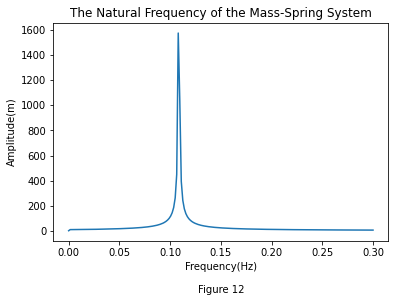

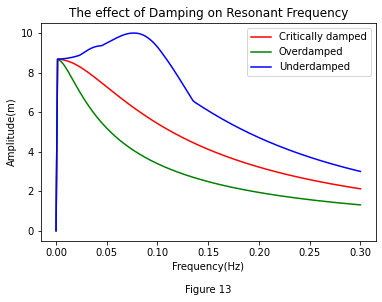

The natural frequency is 0.108 +/- 0.0015 Hz
The resonant frequency in the critically damped system is 0.0015 +/- 0.0015 Hz
The resonant frequency in the overdamped system is 0.0015 +/- 0.0015 Hz
The resonant frequency in the underdamped system is 0.0765 +/- 0.0015 Hz


In [24]:
c = 0.0015 #the frequency step in Hertz
frequencies_array = np.arange(0, (0.3 + c), c)

plt.plot(frequencies_array, eulercromer_sin_drivingforce_resonance_1(0, 10, frequencies_array)[0])
plt.xlabel('''Frequency(Hz)
           
Figure 12''')
plt.ylabel('Amplitude(m)')
plt.title('The Natural Frequency of the Mass-Spring System')
plt.show()

plt.plot(frequencies_array, eulercromer_sin_drivingforce_resonance_1(b_cr, 10, frequencies_array)[0], 'r', 
         label='Critically damped')
plt.plot(frequencies_array, eulercromer_sin_drivingforce_resonance_1(b_cr * 2, 10, frequencies_array)[0], 'g',
        label='Overdamped')
plt.plot(frequencies_array, eulercromer_sin_drivingforce_resonance_1(b_cr / 2, 10, frequencies_array)[0], 'b', 
        label='Underdamped')
plt.xlabel('''Frequency(Hz)
           
Figure 13''')
plt.ylabel('Amplitude(m)')
plt.title('The effect of Damping on Resonant Frequency')
plt.legend()
plt.show()

print('The natural frequency is', 
      frequencies_array[np.argmax(eulercromer_sin_drivingforce_resonance_1(0, 10, frequencies_array)[0])], '+/-', c, 'Hz')

print('The resonant frequency in the critically damped system is', 
      frequencies_array[np.argmax(eulercromer_sin_drivingforce_resonance_1(b_cr, 10, frequencies_array)[0])], '+/-', c, 'Hz')

print('The resonant frequency in the overdamped system is', 
      frequencies_array[np.argmax(eulercromer_sin_drivingforce_resonance_1(b_cr * 2, 10, frequencies_array)[0])], 
      '+/-', c, 'Hz')

print('The resonant frequency in the underdamped system is', 
      frequencies_array[np.argmax(eulercromer_sin_drivingforce_resonance_1(b_cr / 2, 10, frequencies_array)[0])], 
      '+/-', c, 'Hz')

The resonant frequency of the critically and overdamped systems are close to each other. This is to be expected, using equation 22. If the value of c (the frequency step) is lowered, then the frequencies will become different from one another. However, this will result in the code taking a longer time to run.

## More than one oscillator

In the following code, the time step, $h$ must change. This is because in this section of the notebook, the solutions for position of each mass depend on the position of other masses which they are connected to as well as their own position at the previous. This means that the errors associted with the Euler-Cromer method (discussed in the Euler-Cromer method section) accumulate quickly, violating energy conservation. Therefore, the value of $h$ must become much smaller. If $h$ was this small for all of the code, then it would take too long a time to run.

In [25]:
T = 220
h = 0.0001
nsteps = int(T / h)
time = np.arange(0, nsteps)

### Coupled oscillator

This section of code investigates the 1 dimensional motion of two masses coupled together by springs. The layout for this is shown below.

<p><div align="center">$\large{\mid{}eeeeOeeeeOeeee\mid{}}$</div></p>

The both masses have the same mass, $m$ and the system is held between two rigid, immovable walls. The spring constant of the middle spring can be different. The acceleration of each of the masses is given by the set of equations below:

<p><div align="center">$a_1 = \large{\frac{1}{m}}(-(k + \kappa)x_1 + \kappa x_2)$</div><div align="right">Equation 23</div></p>

<p><div align="center">$a_2 = \large{\frac{1}{m}}(-(k + \kappa)x_2 + \kappa x_1)$</div><div align="right">Equation 24</div></p>

where the subscript on a term relates to the mass (the masses are numbered left to right). The term $\kappa$ is the spring constant of the middle spring and $k$ is the spring constant of the springs on the left and right.

The function coupled_oscillator makes use of these equations above and the Euler-Cromer method (given by equation 17) to calculate the position and velocity of each of the masses. These are then plotted in Figure 14. The plot can be changed by changing the arguments of the function. The arguments which contain x where the function is defined relate to the inital displacement of each mass. The arguments k_ends and k_middle are the spring constants of the springs at the ends of the system and the spring in the middle respectively. The argument, m_value dictates the mass of the masses.

There are two normal modes for this system.

1. $x_{0_1} = x_{0_2}$. This corresponds to the masses moving in phase.

2. $x_{0_1} = -x_{0_2}$. This corresponds to the masses moving out of phase.

Beats can also be generated using this system. This occurs when the frequencies of two normal modes become close. If two frequencies close to each other are excited, then the oscillation of the system is the sum of each of the solutions for each frequency. However, this solution also has an envelope frequency given by half the difference between the two frequencies. This is much lower than the sum frequency.

Currently, Figure 14 shows beats in the system. If the arguments of the coupled_oscillator function are changed when plotting the positions of each of the masses, then the plot of the position of the masses oscillation with the normal mode scan be seen.

In [26]:
def coupled_oscillator(x0_1, x0_2, k_ends, k_middle, m_value):#displacements in m, k in N/m and masses in kg 
    
    x_1 = np.zeros(nsteps)
    v_1 = np.zeros(nsteps)
    x_1[0] = x0_1
    v_1[0] = v0
    
    x_2 = np.zeros(nsteps)
    v_2 = np.zeros(nsteps)
    x_2[0] = x0_2
    v_2[0] = v0
    
    for i in range(nsteps - 1):
        
        a_1 = (1 / m_value) * (-1 * (k_ends + k_middle) * x_1[i] + k_middle * x_2[i])
        a_2 = (1 /m_value) * (-1 * (k_ends + k_middle) * x_2[i] + k_middle * x_1[i])

        v_1[i + 1] = v_1[i] - h * a_1
        v_2[i + 1] = v_2[i] - h * a_2

        x_1[i + 1] = x_1[i] - h * v_1[i]
        x_2[i + 1] = x_2[i] - h * v_2[i]

    return x_1, x_2, v_1, v_2

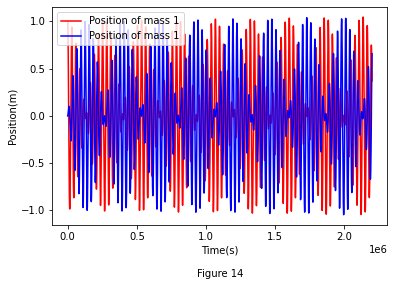

In [32]:
plt.plot(coupled_oscillator(1, 0, 4, 0.5, 1)[0], 'r', label='Position of mass 1')
plt.plot(coupled_oscillator(1, 0, 4, 0.5, 1)[1], 'b', label='Position of mass 1')
plt.xlabel('''Time(s)

Figure 14''')
plt.ylabel('Position(m)')
plt.legend(loc='best')
plt.show()

### Determining normal frequencies of a molecule

A coupled oscillator is analagous to a molecule. This model's implications have uses in molecular spectroscopy. Since a coupled oscillator resonates at certain frequncies, the normal frequencies can be determined by experiment. Radiation can be used to drive the molecule at a range of frequencies and so the normal frequency of the molecule can be determined by measuring the transmitted intensity.

The layout of this system is the same as above, with the exception that all springs have the same spring constant and mass 1 is connected to the driver via the spring to the left of it. This driver represents the incident radiation on the molecule.

The acceleration of each of the masses is given by the set of equations below:

<p><div align="center">$a_1 = \large{\frac{k}{m}}x_2 - \large{\frac{2k}{m}}x_1 + \large{\frac{kA}{m}}sin(\omega t)$</div><div align="right">Equation 25</div></p>

<p><div align="center">$a_2 = \large{\frac{k}{m}}x_1 - \large{\frac{2k}{m}}x_2$</div><div align="right">Equation 26</div></p>

where the masses are numbered as before, A is the amplitude of the driving force and $\omega$ is the angular driving frequency. Equation 26 does not contain any terms related to the driver as mass 2 is not connected to the driver.

There are two normal modes for this system. 

1. $\omega = \large{\sqrt{\frac{k}{m}}}$

2. $\omega = \large{\sqrt{\frac{3k}{m}}}$

When the system is driven at one of these normal frequencies, it leads to resonance. This can be seen in Figure 15.

The forced_coupled_oscillator function calculates the amplitude of the system for a range of driving frequencies. It makes use of equations 25 and 26 and works in a similar way to the eulercromer_sin_drivingforce_resonance_1 function (in the investigating resonance function).

In [28]:
def forced_coupled_oscillator(k_value, m_value, driving_freq, A):#k_value in N/m, m_value in kg, driving_freq in rad/s, A in N
    
    x_1 = np.zeros(nsteps)
    v_1 = np.zeros(nsteps)
    x_1[0] = 0
    v_1[0] = 0
    
    x_2 = np.zeros(nsteps)
    v_2 = np.zeros(nsteps)
    x_2[0] = 0
    v_2[0] = 0
    
    amp_array_3 = np.array([])
    amp_array_4 = np.array([])

    
    for drivingfreq in driving_freq:
    
        for i in range(nsteps - 1):

            a_1 = (k_value / m_value) * (A * np.sin(drivingfreq * time[i]) + x_2[i] - 2 * x_1[i])
            a_2 = (k_value /m_value) * (x_1[i] - 2 * x_2[i])

            v_1[i + 1] = v_1[i] - h * a_1
            v_2[i + 1] = v_2[i] - h * a_2

            x_1[i + 1] = x_1[i] - h * v_1[i]
            x_2[i + 1] = x_2[i] - h * v_2[i]

        amp_1 = max(x_1)
        amp_2 = max(x_2)

        amp_array_3 = np.append(amp_array_3, amp_1)
        amp_array_4 = np.append(amp_array_4, amp_2)

                    
    return amp_array_3, amp_array_4

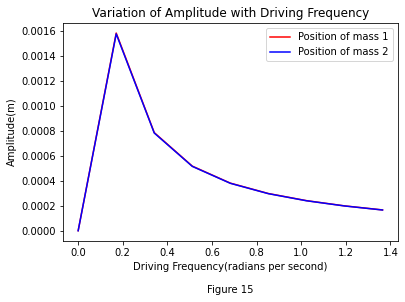

In [29]:
driving_freq_array = np.arange(0, np.sqrt(5 * k / m), 0.25 * np.sqrt(k / m))
plt.plot(driving_freq_array, forced_coupled_oscillator(k, m, driving_freq_array, 5)[0], 'r', label='Position of mass 1')
plt.plot(driving_freq_array, forced_coupled_oscillator(k, m, driving_freq_array, 5)[1], 'b', label='Position of mass 2')
plt.xlabel('''Driving Frequency(radians per second)

Figure 15''')
plt.ylabel('Amplitude(m)')
plt.legend()
plt.title('Variation of Amplitude with Driving Frequency')
plt.show()

In order to see the resonance of the second normal mode, range and step size of driving_freq_array must be changed. This is because both frequencies are irrational numbers and close to one another. Therefore, it is difficult to choose a step size for which both frequencies are given as arguments to the forced_coupled_oscillator function without a large runtime.

### A linear triatomic molecule

This section of code investigates the motion of three masses joined horizontally by springs of the same spring constant. This system is analagous to a linear, triatomic molecule (such as $CO_2$) with motion in 1 dimension. The masses are arranged as shown below.

<p><div align="center">$\large{OeeeeOeeeeO}$</div></p>

Each of the masses has a different equation of motion. The acceleration for each particle is given by the set of equations below:

<p><div align="center">$a_1 = \large{\frac{1}{m_1}}(-2kx_1 + kx_2)$</div><div align="right">Equation 27</div></p>
<p><div align="center">$a_2 = \large{\frac{1}{m_2}}(-2kx_2 + kx_1 + kx_3)$</div><div align="right">Equation 28</div></p>
<p><div align="center">$a_3 = \large{\frac{1}{m_3}}(-2kx_3 + kx_2)$</div><div align="right">Equation 29</div></p>

where the subscript on a term relates to the mass (the masses are numbered left to right).

The function eulercromertriatomic makes use of these equations above and the Euler-Cromer method (given by equation 17) to calculate the position and velocity of each of the masses. These are then plotted in Figure 16. The plot can be changed by changing the arguments of the function. The arguments which contain x where the function is defined relate to the inital displacement of each mass and arguments which contain m where the function is defined relate to the mass of each mass. The argument, k_value dictates the spring constant of the springs.

When masses 1 and 3 have the same mass, there are three normal modes for this system.

1. $x_{0_1} = x_{0_2} = x_{0_3}$. This corresponds to the molecule translating.

2. $x_{0_1} = -x_{0_3}, x_{0_2} = 0$. This corresponds to a symmetric stretch.

3. $x_{0_1} = -x_{0_3} = x_{0_2}\Large{\frac{-\omega^2}{2\bar{\omega}^2}}$ where $\large{\omega = \frac{k}{m_1}}$ and $\large{\bar{\omega} = \frac{k}{m_2}}$. This corresponds to an asymmetric stretch.

Currently, Figure 16 shows the motion in a system where all masses are the same and which is oscillating with the second normal mode.

In [30]:
def eulercromertriatomic(x0_1, m_1, x0_2, m_2, x0_3, m_3, k_value): #displacements in m, masses in kg and k in N/m
    
    
    x_1 = np.zeros(nsteps)
    v_1 = np.zeros(nsteps)
    x_1[0] = x0_1
    v_1[0] = v0
    
    x_2 = np.zeros(nsteps)
    v_2 = np.zeros(nsteps)
    x_2[0] = x0_2
    v_2[0] = v0
    
    x_3 = np.zeros(nsteps)
    v_3 = np.zeros(nsteps)
    x_3[0] = x0_3
    v_3[0] = v0
    
    for i in range(nsteps - 1):
        
        a_1 = (1 / m_1) * (-2 * k_value * x_1[i] + k_value * x_2[i])
        a_2 = (1 /m_2) * (-2 * k_value * x_2[i] + k_value * x_1[i] + k_value * x_3[i])
        a_3 = (1 / m_3) * (-2 * k_value * x_3[i] + k_value * x_2[i])

        v_1[i + 1] = v_1[i] - h * a_1
        v_2[i + 1] = v_2[i] - h * a_2
        v_3[i + 1] = v_3[i] - h * a_3

        x_1[i + 1] = x_1[i] - h * v_1[i]
        x_2[i + 1] = x_2[i] - h * v_2[i]
        x_3[i + 1] = x_3[i] - h * v_3[i]
    
    return x_1, x_2, x_3, v_1, v_2, v_3

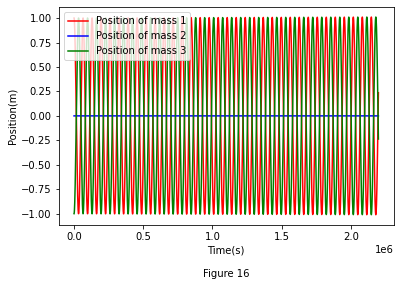

In [31]:
x_pos_tri = eulercromertriatomic(1, m, 0, m, -1, m, k)
plt.plot(time, x_pos_tri[0], 'r', label='Position of mass 1')
plt.plot(time, x_pos_tri[1], 'b', label='Position of mass 2')
plt.plot(time, x_pos_tri[2], 'g', label='Position of mass 3')
plt.xlabel('''Time(s)

Figure 16''')
plt.ylabel('Position(m)')
plt.legend()
plt.show()